#  Дневное прогнозирования продаж TZ_DPP

<img src="logoRB.png" width="100">


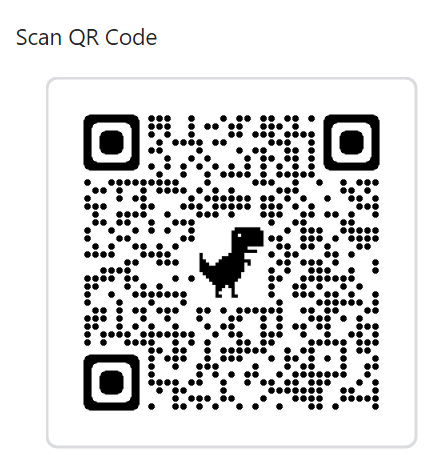

## Техническое задание

ТЗ  дневное прогнозирования продаж

Цель: Создать систему прогнозирования дневных продаж на основании имеющихся данных о продажах за прошлые и настоящие периоды. Дневные продажи по торговой точке описываются двумя усредненными  показателями:  Количество чеков (трафик) и Средний чека (ассортимент, цены, качество). 

Задача: На данном этапе требуется создать алгоритм прогноза Количества чеков по Торговым Точкам (далее ТТ) на основе некоторых выбранных конкретных факторов. Протестировать алгоритм на прошлых периодах – вывести процент ошибки, выявить аномалии, при необходимости скорректировать количество и качество учитываемых факторов. 

Практическое применение: Прогнозное количество чеков по дням можно суммировать на недельные и месячные прогнозы для использования в качестве основы (базы) для финансового планирования. 

Дальнейшие планы: Дальнейшей задачей будет прогноз продаж по среднему чеку по такому же алгоритму  для использования в качестве основы (базы) для финансового,  производственного и маркетингового планирования. В последующем перейти на прогноз по количеству позиций в разрезе категорий продукции итд.
Полный текск ТЗ по ссылке https://docs.google.com/document/d/1ys7h2NObt_Th5PCHJ6PFiPSh5ROTlMCc/edit?usp=share_link&ouid=114754993604113703845&rtpof=true&sd=true

# Импорт библиотек Imports

In [2]:
import pandas as pd
import os

## Загрузка данных

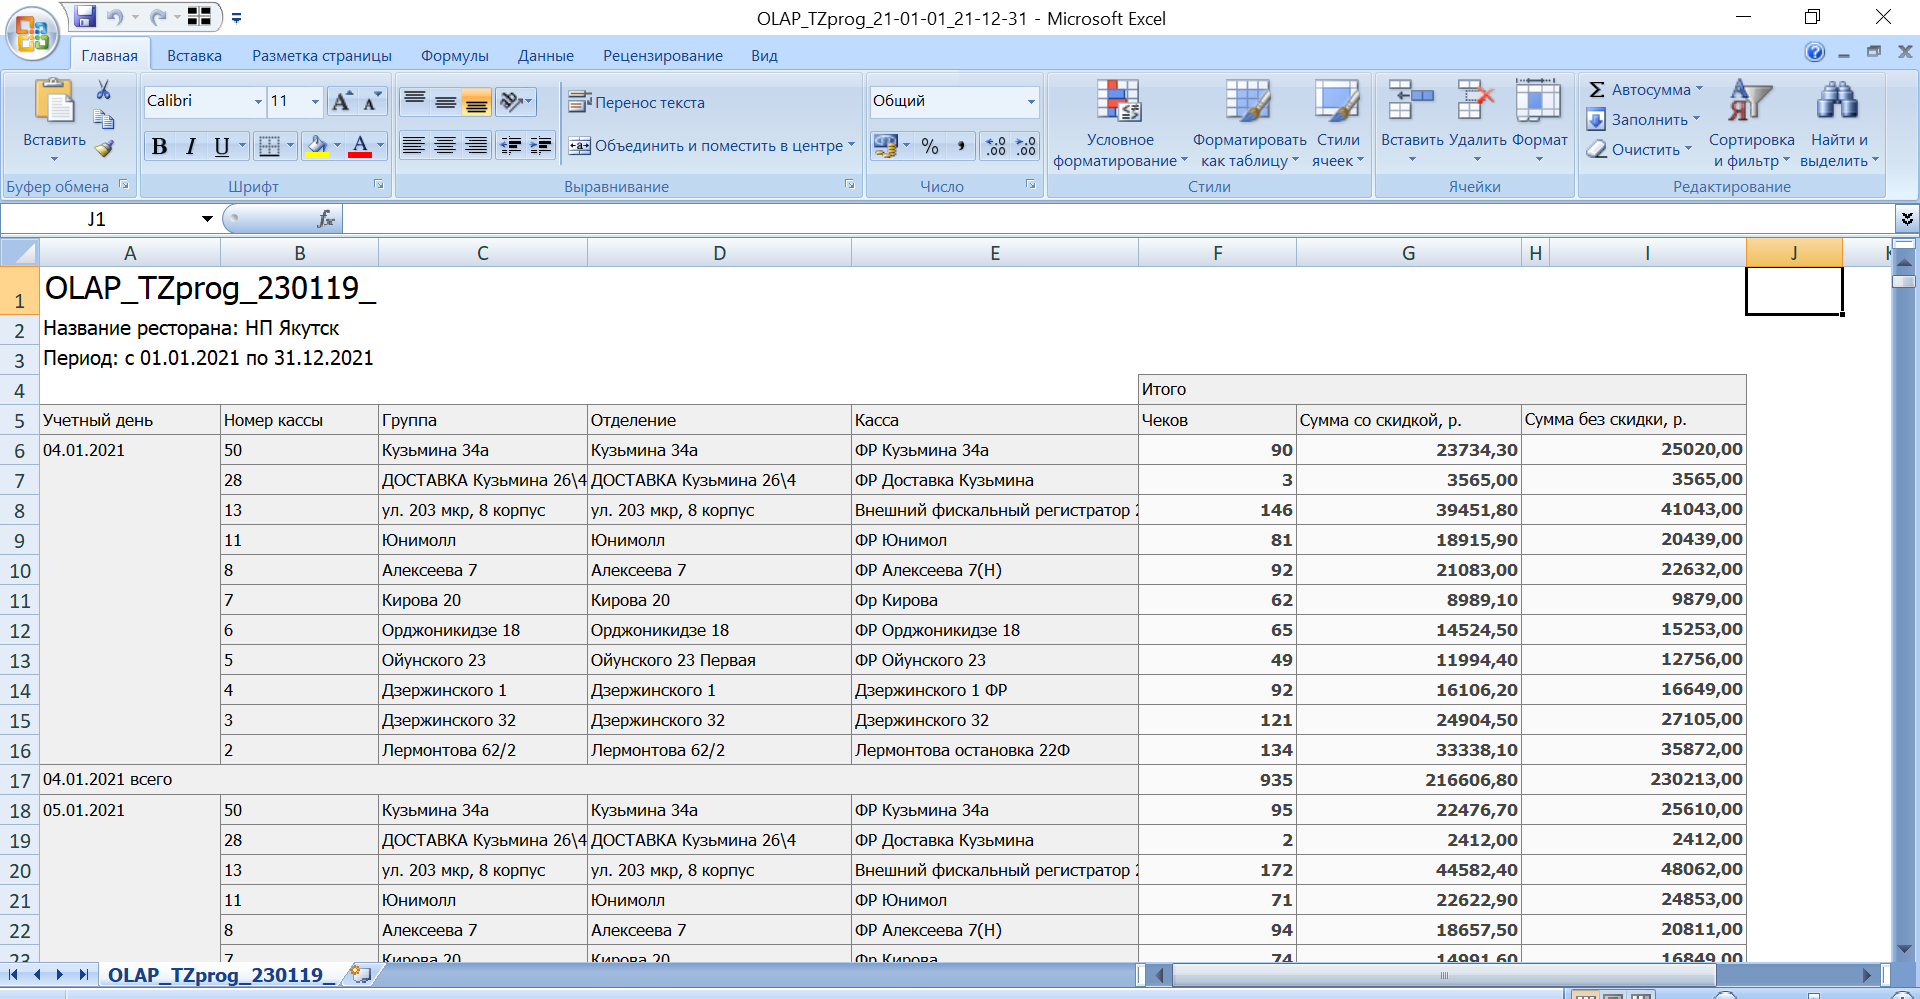

In [164]:
soursefolder = '../data/OLAP_TZprog/'
filesall = [entery.name[:15] for entery in os.scandir(soursefolder) if entery.name[0]!='~']
# [_ for _ in enumerate(filesall)]

In [44]:
files = [entery.name for entery in os.scandir(soursefolder)\
           if entery.name[:14]=='OLAP_TZprog_21' 
           or entery.name[:14]=='OLAP_TZprog_22' 
           or entery.name[:14]=='OLAP_TZprog_23']
[_ for _ in enumerate(files)]

[(0, 'OLAP_TZprog_21-01-01_21-12-31.xlsx'),
 (1, 'OLAP_TZprog_22-01-01_22-12-31_ручное_испр_мож_ойунск_25ноябр_7дек.xlsx'),
 (2, 'OLAP_TZprog_23-01-01_23-12-15.xlsx')]

In [45]:
# !!!
dfs = []
for filename in files:
    df = pd.read_excel(soursefolder+filename,header=4)
    df['filename'] = filename
    dfs.append(df)
    print(f'{filename} --> {len(df)}')
df = pd.concat(dfs, ignore_index=True)

OLAP_TZprog_21-01-01_21-12-31.xlsx --> 5125
OLAP_TZprog_22-01-01_22-12-31_ручное_испр_мож_ойунск_25ноябр_7дек.xlsx --> 7262
OLAP_TZprog_23-01-01_23-12-15.xlsx --> 276


In [46]:
#Заполняем
list_for_ffill=['Учетный день']

In [47]:
for _ in list_for_ffill:
    df[_].ffill(inplace=True)

In [48]:
df.dropna(subset=["Номер кассы"], inplace=True)

In [49]:
df.reset_index(drop=True, inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11920 entries, 0 to 11919
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Учетный день          11920 non-null  object        
 1   Номер кассы           11920 non-null  float64       
 2   Группа                11920 non-null  object        
 3   Отделение             11920 non-null  object        
 4   Касса                 11920 non-null  object        
 5   Чеков                 11920 non-null  int64         
 6   Сумма со скидкой, р.  11920 non-null  float64       
 7   Сумма без скидки, р.  11920 non-null  float64       
 8   filename              11920 non-null  object        
 9   date                  11920 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 931.4+ KB


In [318]:
df.head()

,Учетный день,Номер кассы,Группа,Отделение,Касса,Чеков,"Сумма со скидкой, р.","Сумма без скидки, р.",filename,date,year,month,week,absweek
0,2021-01-04 00:00:00,50.0,Кузьмина 34а,Кузьмина 34а,ФР Кузьмина 34а,90,23734.3,25020.0,OLAP_TZprog_21-01-01_21-12-31.xlsx,2021-01-04,2021,1,1,202101
1,2021-01-04 00:00:00,28.0,ДОСТАВКА Кузьмина 26\4,ДОСТАВКА Кузьмина 26\4,ФР Доставка Кузьмина,3,3565.0,3565.0,OLAP_TZprog_21-01-01_21-12-31.xlsx,2021-01-04,2021,1,1,202101
2,2021-01-04 00:00:00,13.0,"ул. 203 мкр, 8 корпус","ул. 203 мкр, 8 корпус","Внешний фискальный регистратор 203 мкр, 8 корпус",146,39451.8,41043.0,OLAP_TZprog_21-01-01_21-12-31.xlsx,2021-01-04,2021,1,1,202101
3,2021-01-04 00:00:00,11.0,Юнимолл,Юнимолл,ФР Юнимол,81,18915.9,20439.0,OLAP_TZprog_21-01-01_21-12-31.xlsx,2021-01-04,2021,1,1,202101
4,2021-01-04 00:00:00,8.0,Алексеева 7,Алексеева 7,ФР Алексеева 7(Н),92,21083.0,22632.0,OLAP_TZprog_21-01-01_21-12-31.xlsx,2021-01-04,2021,1,1,202101


### Предварительный визуальный анализ загрузки и создание таблицы с "необычными" данными для исключения


Подгружены данные, с 01-01-2021 по 15-01-2023 Построены визуализации и сделаны такие выводы: 
1. В течении года 'необычных' недель  которые нужно исключить из расчета среднего 53 и 1,2 недели, таким образом , например 1-2 и 51-52 недели года.
#### По 53 и 1, 2 неделям

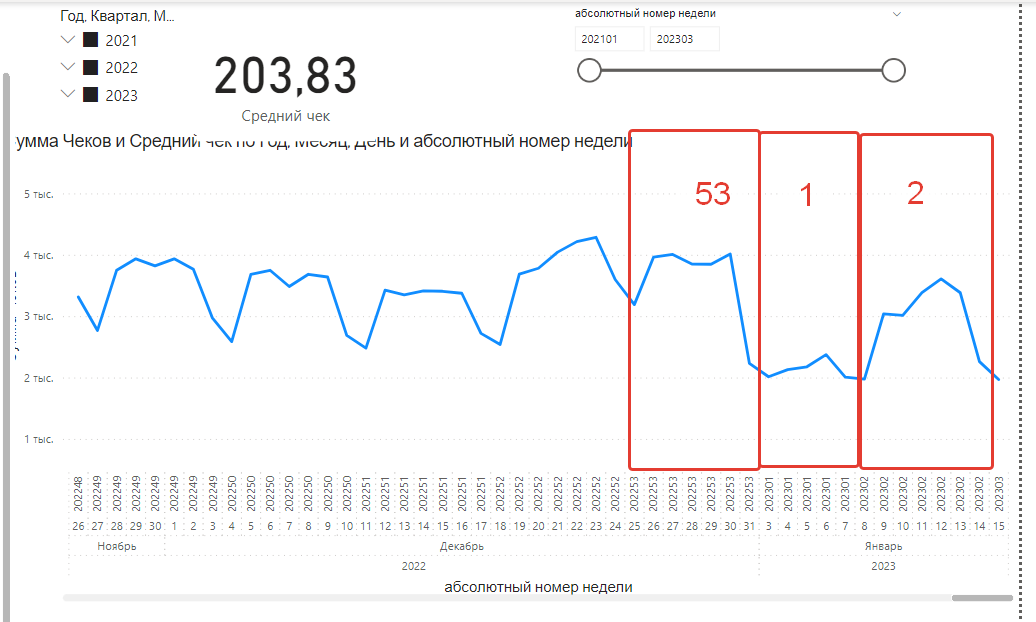

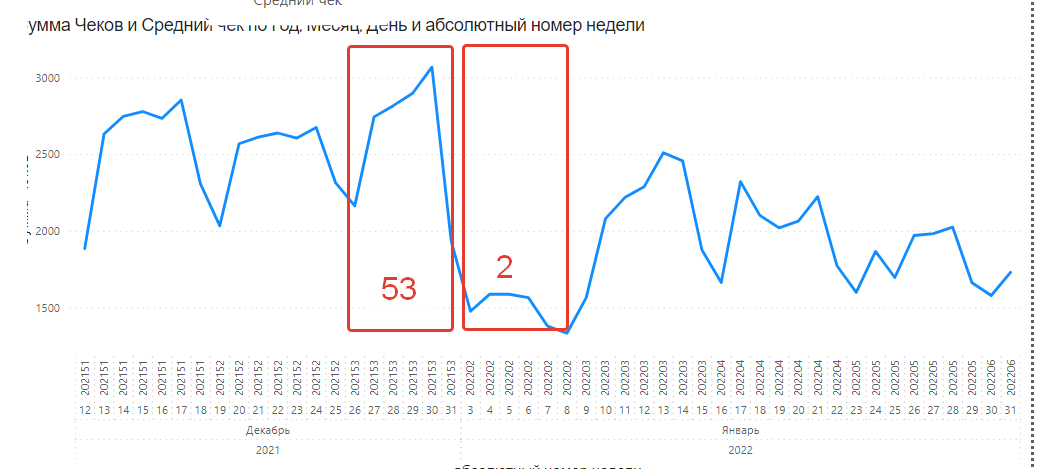

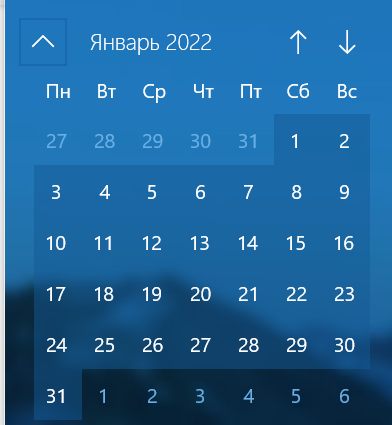

#### По 45  неделе 2021 и 2022 года

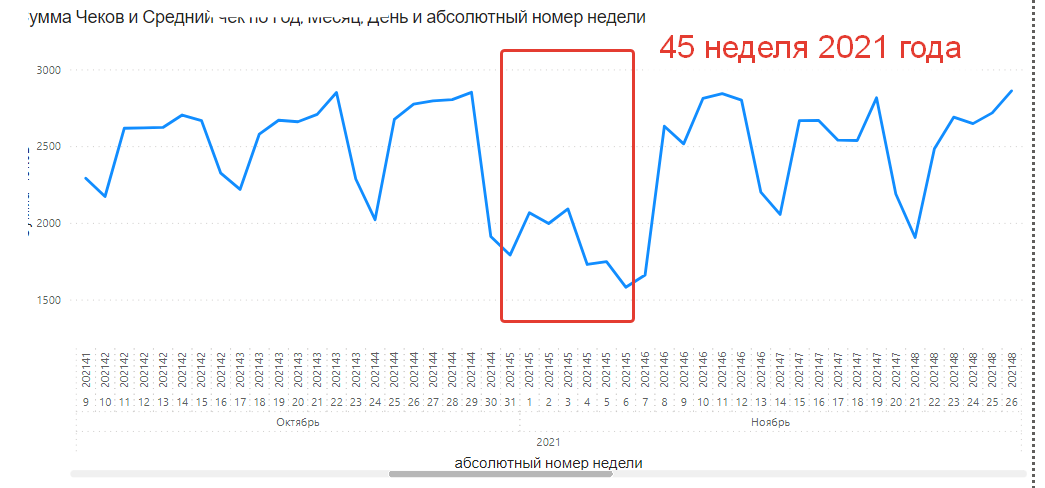

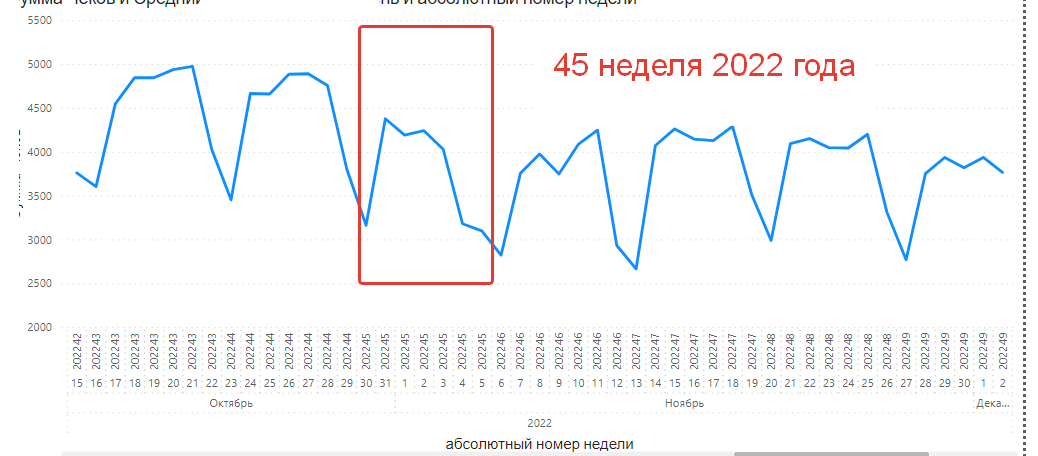



## ВЫВОД: в таблицу с "необычными" данными для исключения принять толко 53 неделю 2021 года, 1, 2, 53 недели 2022 года и 1 неделю 2023. Остальные недели пока оставить
 

# Обработка данных о продажах из IIKO

In [54]:
df['date']=pd.to_datetime(df['Учетный день'])

In [58]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [62]:
df['week'] = df['date'].dt.week

C:\Users\diva0\AppData\Local\Temp/ipykernel_12648/3618305604.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week


### Нормализация. 
Данные о количестве чеков все разные, очень зависят от ТТ от месяца, года, а для выявления зависимости от наших 6 факторов надо их нормализовать, те привести к коэффициенту который соизмерим.

In [91]:
#вычислим количесто чеков в день за текущую неделю 'avg_day'
# для этого определим поле для абсолютных недель
# создадим таблицу по неделям
df['absweek'] = df['year']*100+df['week']
df_absweek=df[['absweek','Отделение','Чеков']]\
      .groupby(by=['absweek','Отделение']).aggregate({'Чеков':'sum'})\
      .reset_index()
df_absweek['avg_day'] = df_absweek['Чеков']/7

In [166]:
# таблица по неделям
df_absweek.head()

,absweek,Отделение,Чеков,avg_day
0,202101,Алексеева 7,593,84.714286
1,202101,ДОСТАВКА Кузьмина 26\4,18,2.571429
2,202101,Дзержинского 1,715,102.142857
3,202101,Дзержинского 32,715,102.142857
4,202101,Кирова 20,479,68.428571


In [252]:
#присоединяем ее к нашей таблице из iiko
normalize = pd.merge(left=df,right=df_absweek, how='left', 
         left_on=['absweek','Отделение'], right_on=['absweek','Отделение'],
        )#.to_excel(soursefolder+'tmp_normalize.xlsx')


In [256]:
normalize['NORMALIZE'] = normalize['Чеков_x']/normalize['avg_day']

In [324]:
# Получена таблица с коэффициентами поправки количества чеков (поле NORMALIZE)
normalize[['Учетный день','week','Отделение','Чеков_x','Сумма без скидки, р.','filename','avg_day','NORMALIZE']].sample(15)

,Учетный день,week,Отделение,Чеков_x,"Сумма без скидки, р.",filename,avg_day,NORMALIZE
11334,2022-12-15 00:00:00,50,Орджоникидзе 18,189,38544.92,OLAP_TZprog_22-01-01_22-12-31_ручное_испр_мож_...,171.000000,1.105263
496,2021-02-19 00:00:00,7,"ул. 203 мкр, 8 корпус",251,62661.00,OLAP_TZprog_21-01-01_21-12-31.xlsx,233.428571,1.075275
3654,2021-10-25 00:00:00,43,ДОСТАВКА Кузьмина 26\4,4,5574.00,OLAP_TZprog_21-01-01_21-12-31.xlsx,2.714286,1.473684
5456,2022-02-13 00:00:00,6,Лермонтова 62/2,212,47107.00,OLAP_TZprog_22-01-01_22-12-31_ручное_испр_мож_...,215.714286,0.982781
1260,2021-04-24 00:00:00,16,Кирова 20,135,25168.00,OLAP_TZprog_21-01-01_21-12-31.xlsx,196.142857,0.688274
5290,2022-02-04 00:00:00,5,Пояркова 21,107,23917.00,OLAP_TZprog_22-01-01_22-12-31_ручное_испр_мож_...,82.571429,1.295848
2927,2021-09-01 00:00:00,35,Орджоникидзе 18,202,39775.00,OLAP_TZprog_21-01-01_21-12-31.xlsx,155.857143,1.296059
3769,2021-11-01 00:00:00,44,Лермонтова 62/2,217,44416.00,OLAP_TZprog_21-01-01_21-12-31.xlsx,195.428571,1.110380
10127,2022-10-17 00:00:00,42,Лермонтова 56а,130,28822.00,OLAP_TZprog_22-01-01_22-12-31_ручное_испр_мож_...,125.000000,1.040000
4861,2022-01-09 00:00:00,1,С. Данилова 1а,32,6880.00,OLAP_TZprog_22-01-01_22-12-31_ручное_испр_мож_...,44.857143,0.713376


### Визуальная проверка нормализации по ТТ
Визуально видно что в результате деления на среднее по неделе выделенеы из общей картины  колебания не связанные с сезоном, дальше для определения закономерностей по дням будем использовать нормализованный коэффицент равный отношению количество чеков на неделе к среднему по неделе.

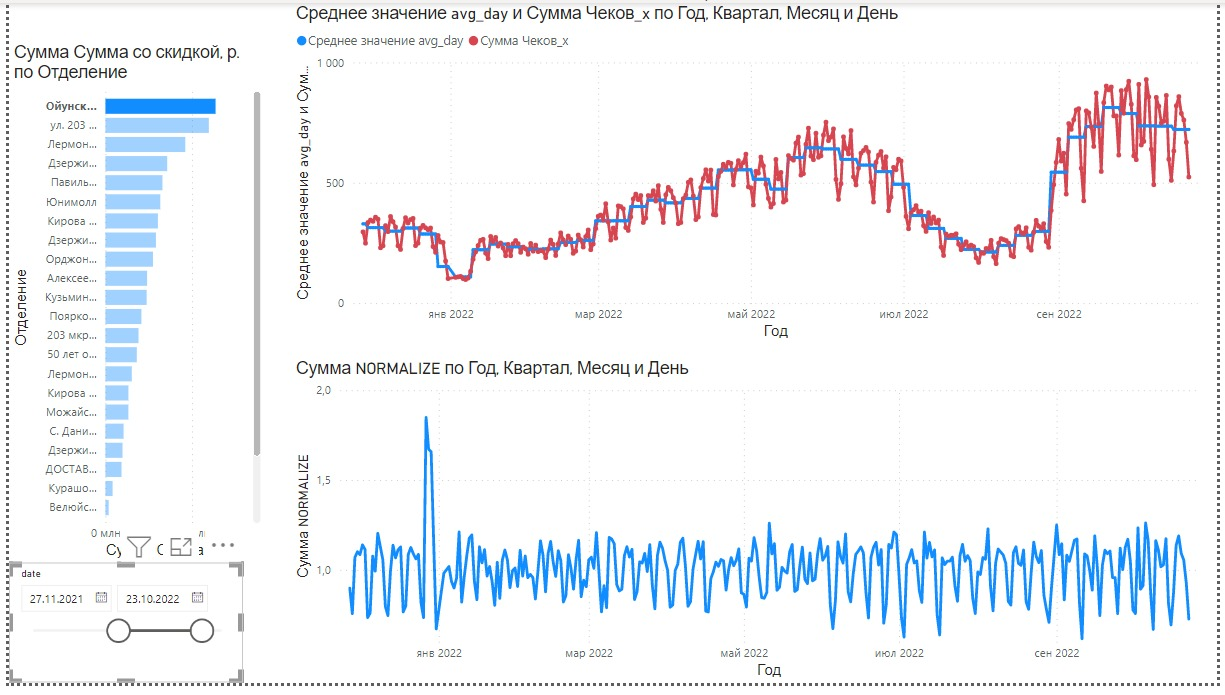


Попутно замечаем явные забросы - ошибки или форс мажор, например видно что Павилион Пояркова 20, по видимому во второй день после открытия6 марта 2022 года  имел пиковое количество чеков, которое потом стабилизировалось, надо такие выбросы исключить из вывода статистики.
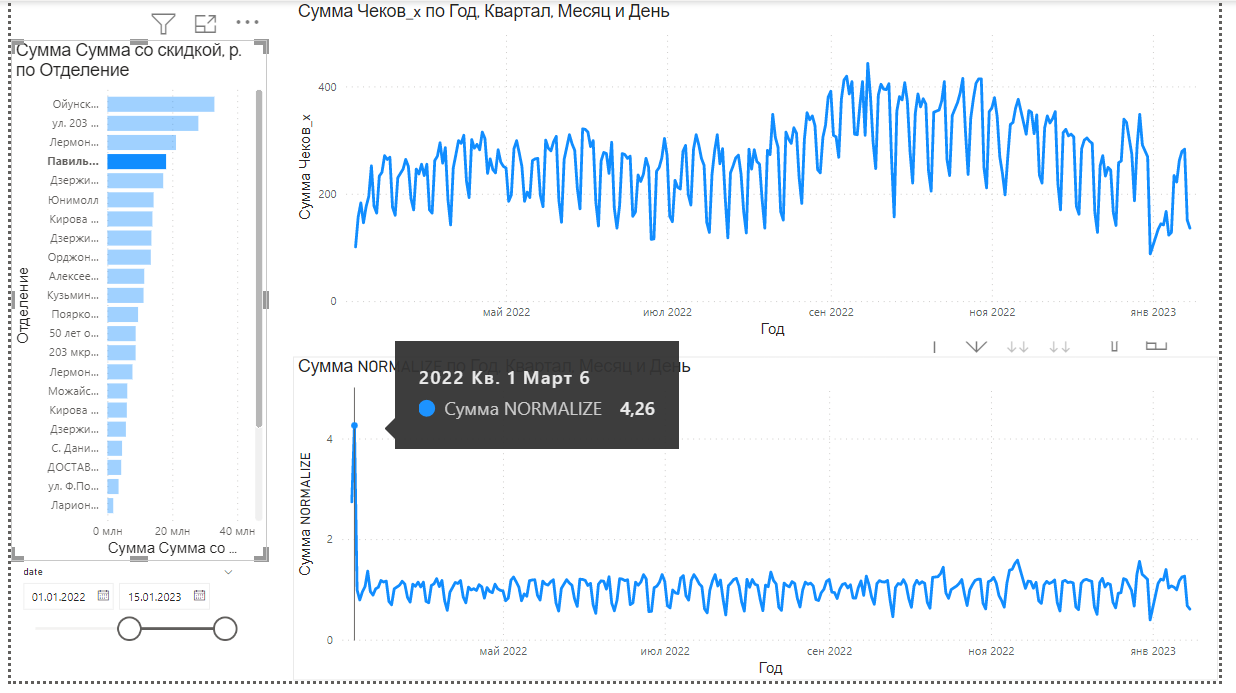

Несистемный всплеск 31 октября 2022 в Юнимоле
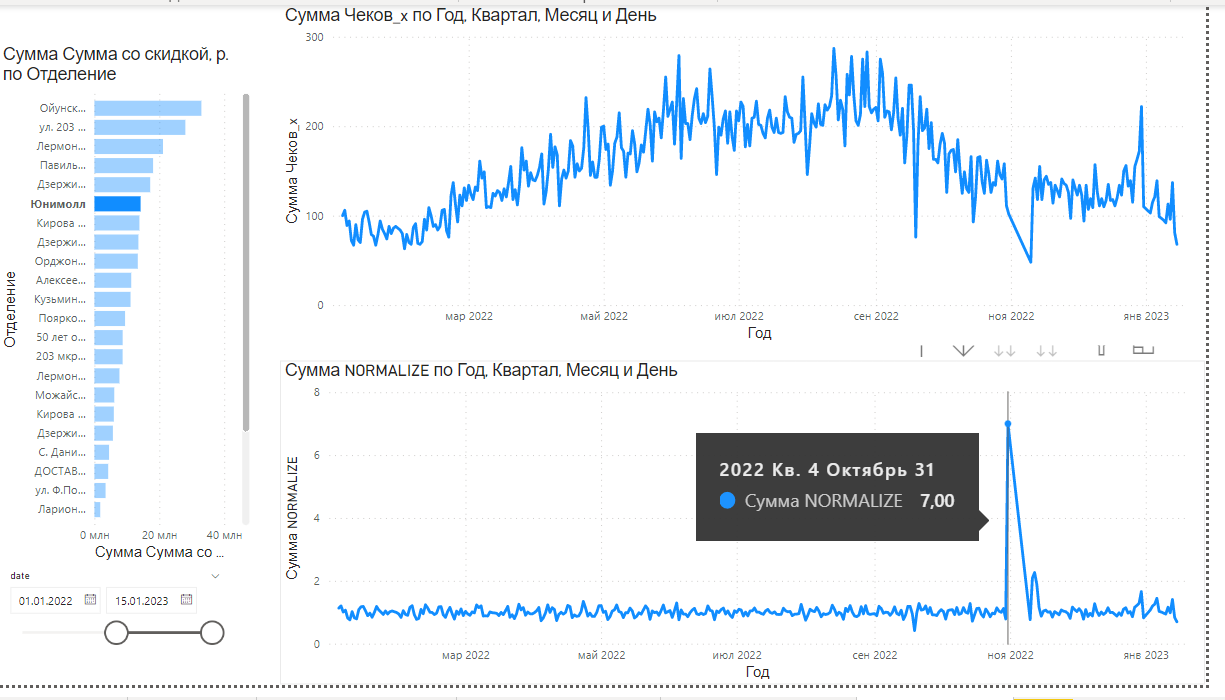
Визуальная проверка правильности расчета средних по неделе:

#### ВЫВОД: Средние по неделе и нормализация посчиталась без ошибок, есть единичные выбросы, которые можно отбросить по (определиться с величиной предельного отклонения  )

# Работа с факторами

### Определенимся с перечнем ТТ для использования в расчете

Вот визуализация списка ТТ которые решено исключить:
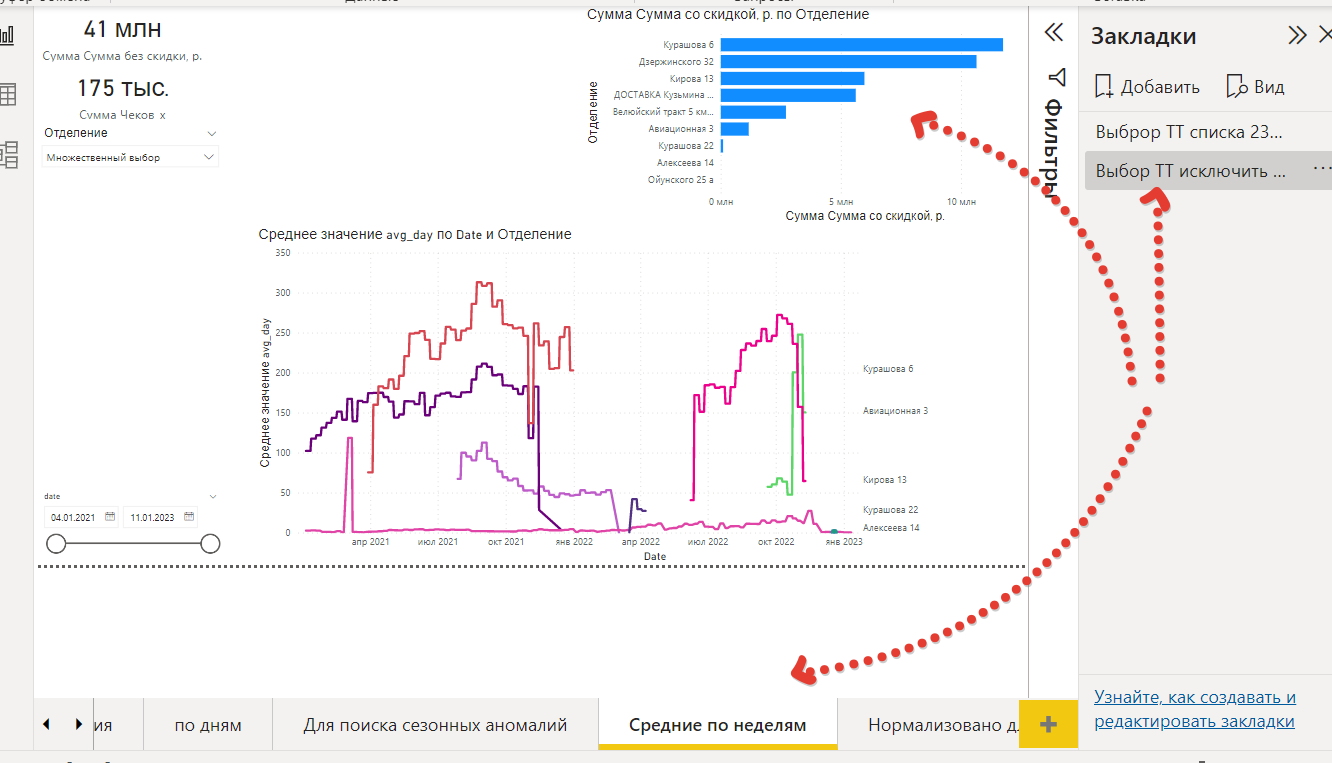

In [121]:
pd.read_csv('../data/Выбор ТТ для исключения анализа - 23-01-19.csv')

,Отделение,"Сумма Сумма со скидкой, р."
0,Курашова 6,11751891.73
1,Дзержинского 32,10646826.85
2,Кирова 13,5980888.77
3,ДОСТАВКА Кузьмина 26\4,5620053.40
4,Велюйский тракт 5 км 34 Булочка,2714523.45
5,Авиационная 3,1164263.02
6,Курашова 22,98096.80
7,Алексеева 14,0.00
8,Ойунского 25 а,0.00


 Перечень всех скачанных ТТ
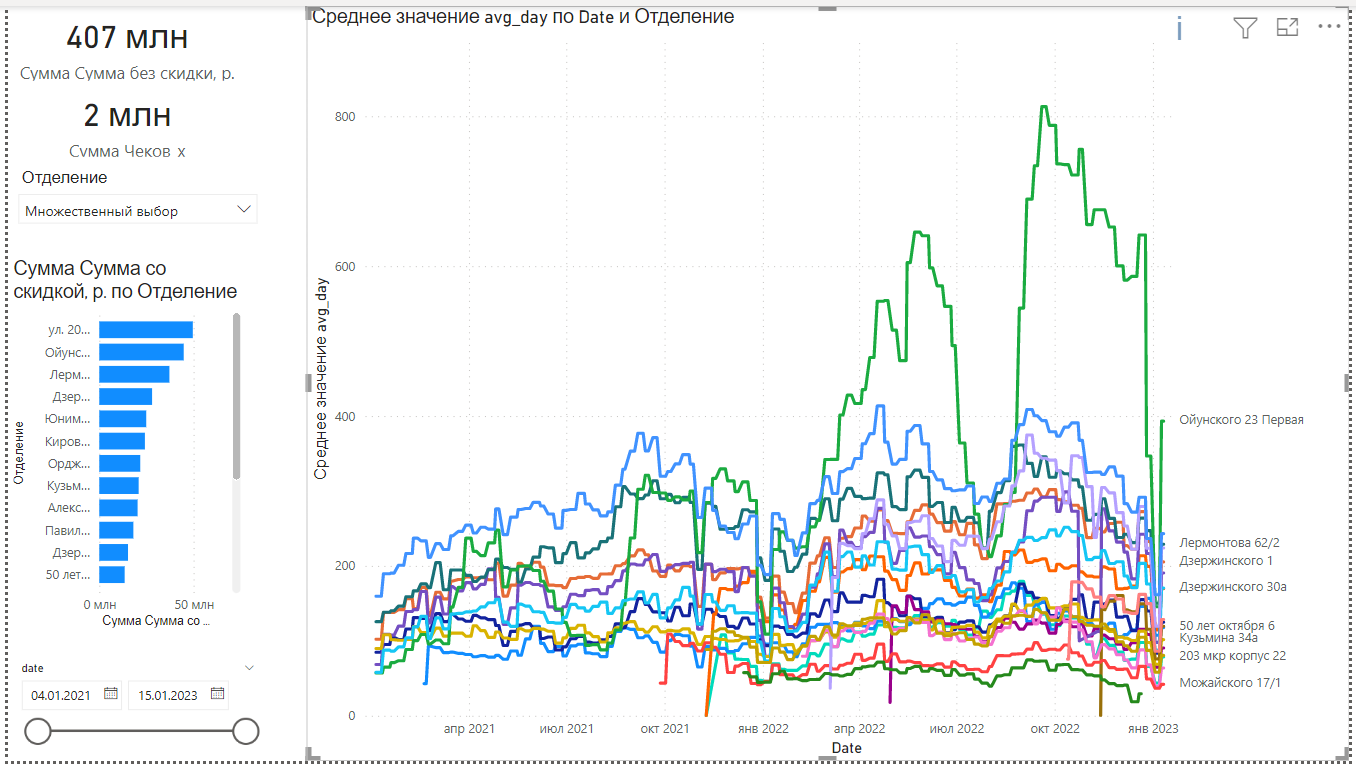

In [120]:
os.listdir('../data')

['for_pwbi',
 'OLAP_TZprog',
 'Выбор ТТ для анализа - 23-01-19.csv',
 'Выбор ТТ для исключения анализа - 23-01-19.csv']

In [167]:
typett = pd.read_csv('../data/Выбор ТТ для анализа - 23-01-19.csv')
#Перечень всех скачанных ТТ
typett.head()

,Отделение,"Сумма Сумма со скидкой, р."
0,"ул. 203 мкр, 8 корпус",49595925.83
1,Лермонтова 62/2,37187900.97
2,Дзержинского 1,28006186.09
3,Юнимолл,24900575.45
4,Кирова 20,24193408.14


### Определеним тип ТТ включенных в расчет
Сссылка на исследование ТТ по недельному трафику часу продаж:  https://docs.google.com/document/d/1d1GGCyrtnoflb0DlU2N2tQnK2AvGr6sm/edit?usp=share_link&ouid=114754993604113703845&rtpof=true&sd=true

In [142]:
allttset = set(typett['Отделение'].to_list())

In [143]:
typett3set = set(['Юнимолл','Можайского 17/1', 'ул. Ф.Попова д. 15','50 лет октября 6'])

In [144]:
typett2set = set(['Лермонтова 62/2','Дзержинского 1','Дзержинского 30а'])

In [168]:
#Это список соответственно ТТ первого типа, нужно уточнить
typett1set = allttset-typett3set-typett2set

In [178]:
#Установка типа ТТ
typett['type'] = typett['Отделение'].map(lambda _: 1 if _ in typett1set \
                                         else 2 if _ in typett2set \
                                         else 3)


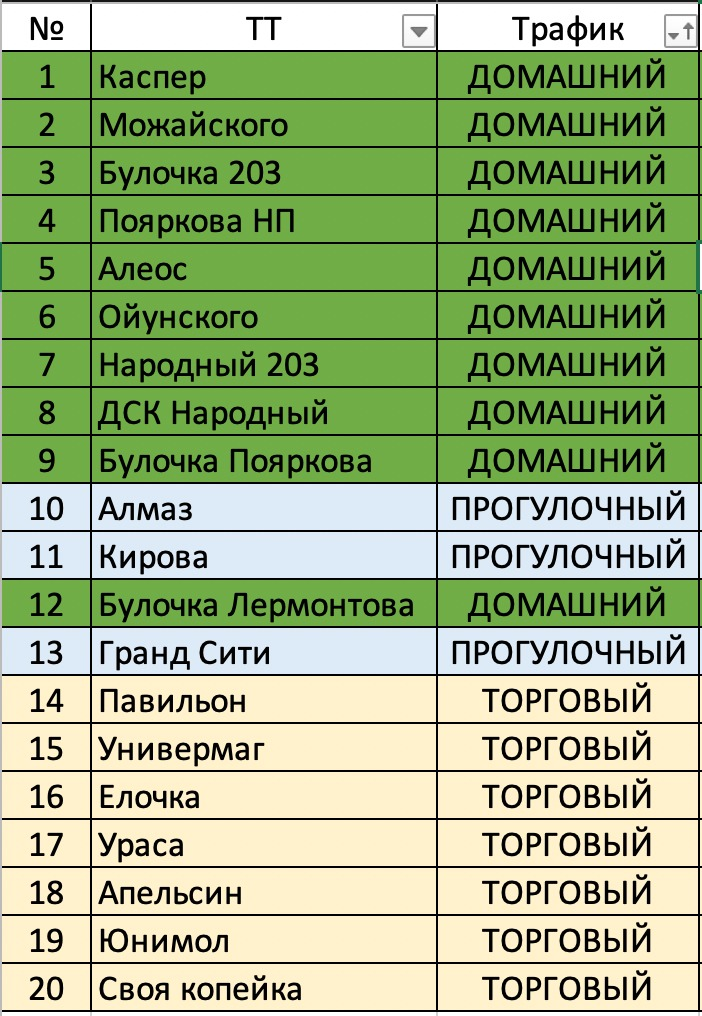

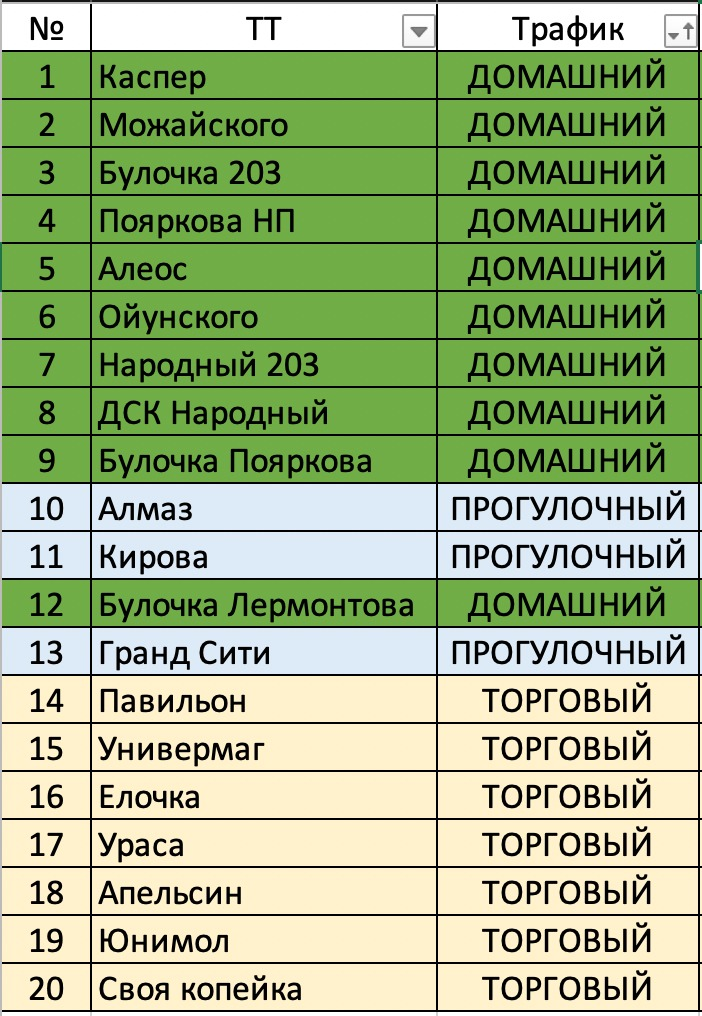

### ВЫВОД: Определил типы и ТТ которые будут участвовать в расчете
 
(typett[['Отделение','type']])

In [171]:
print (typett[['Отделение','type']])

                 Отделение  type
0    ул. 203 мкр, 8 корпус     1
1          Лермонтова 62/2     2
2           Дзержинского 1     2
3                  Юнимолл     3
4                Кирова 20     1
5          Орджоникидзе 18     1
6             Кузьмина 34а     1
7              Алексеева 7     1
8   Павильон Пояркова 20/1     1
9         Дзержинского 30а     2
10        50 лет октября 6     3
11             Пояркова 21     1
12       203 мкр корпус 22     1
13         Можайского 17/1     3
14          Лермонтова 56а     1
15     Дзержинского 42 к.3     1
16          С. Данилова 1а     1
17      ул. Ф.Попова д. 15     3
18            Ларионова 16     1


### Определение справочника праздничных дней и каникул

 Составлена  таблица в data/man_calendar.xlsx с такими данными: День	месяц_	деньнедели	праздник	каникулы
 Вручную введены праздники и предпраздники и пост праздники и каникулы согласно Производственно календарного плана
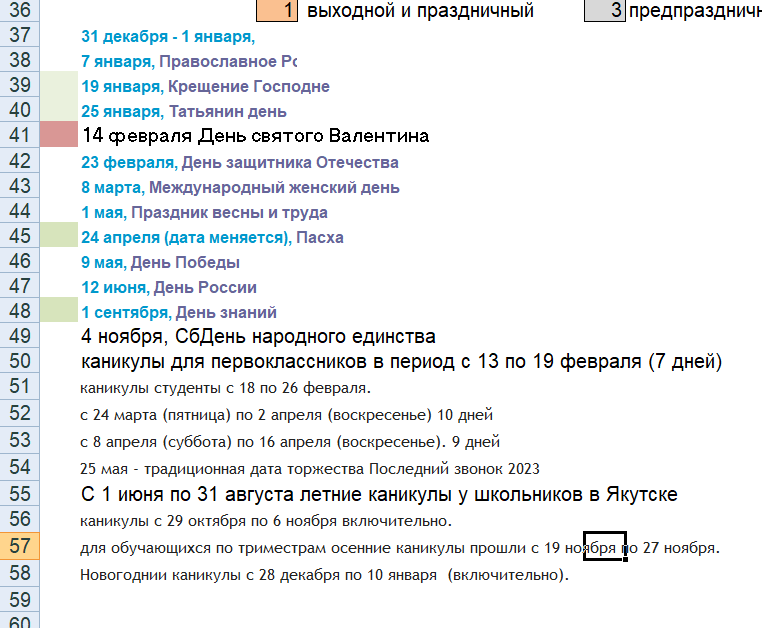

In [275]:
man_calendar = pd.read_excel('../data/catalogs/man_calendar.xlsx')

In [276]:
man_calendar['праздник'].value_counts()

об          685
праздник     25
предпр       19
послепр      16
Name: праздник, dtype: int64

### Определение справочника погода
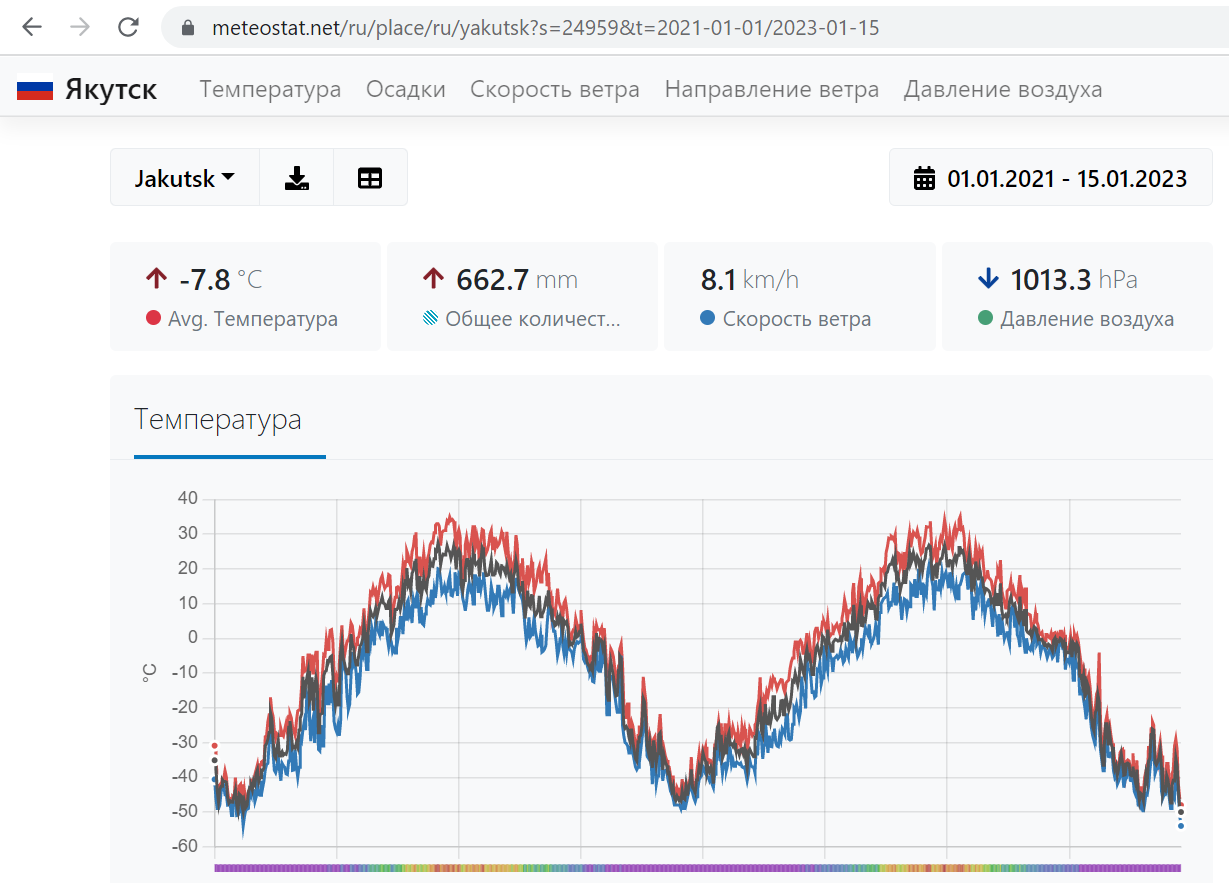

In [206]:
# Скачиваем данные о погоде, файл из сайта https://meteostat.net/ru/place/ru/yakutsk?s=24959&t=2021-01-01/2023-01-15
weather = pd.read_excel('../data/catalogs/weather_2021-2022.xlsx')

In [211]:
weather['date'] = pd.to_datetime(weather['date'])

In [363]:
#Установка границы температуры
t_key = -43
weather['factor'] = weather['tavg'].map(lambda x: f'ниже {t_key}' if x<=t_key else f'выше {t_key}')

In [364]:
# Установка 1 го похолодавшего дня
weather.loc[(weather['factor'].shift(1)==f'выше {t_key}')&(weather['factor']==f'ниже {t_key}'),
           'factor'] = f'переход {t_key}'

In [365]:
weather.head(15)

,date,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,factor
0,2021-01-01,-35.1,-40.6,-30.9,0.0,279.0,0.0,0.0,NaN,1017.4,NaN,выше -43
1,2021-01-02,-36.9,-46.0,-32.2,NaN,279.0,0.0,0.0,NaN,1021.6,NaN,выше -43
2,2021-01-03,-43.8,-49.0,-41.8,0.0,279.0,0.0,0.0,NaN,1023.8,NaN,переход -43
3,2021-01-04,-47.1,-49.0,-46.3,0.0,279.0,0.0,0.0,NaN,1028.3,NaN,ниже -43
4,2021-01-05,-43.5,-48.0,-41.9,0.0,290.0,0.0,0.0,NaN,1032.3,NaN,ниже -43
5,2021-01-06,-42.6,-44.1,-40.8,0.0,290.0,0.0,0.0,NaN,1030.9,NaN,выше -43
6,2021-01-07,-40.7,-44.1,-41.0,0.5,290.0,7.0,1.7,NaN,1021.7,NaN,выше -43
7,2021-01-08,-41.3,-42.5,-40.4,0.5,290.0,15.0,2.6,NaN,1012.9,NaN,выше -43
8,2021-01-09,-41.2,-45.0,-38.1,0.0,290.0,358.0,0.2,NaN,1013.0,NaN,выше -43
9,2021-01-10,-41.4,-45.0,-39.8,0.5,290.0,358.0,0.2,NaN,1018.8,NaN,выше -43


In [269]:
weather['factor'].value_counts()

выше -43       697
ниже -43        36
переход -43     12
Name: factor, dtype: int64

# Сбор всех факторов и целевых данных

## Что мы имеем в итоге

In [ ]:
# Все факторы определили и в итоге имеем:
#1. Нормализованные коэффициенты чеков в день/среднее за неделю по ТТ и типам ТТ normalize
#2. Таблица типов ТТ typett
#3. Календарь с погодой weather
#4. Календарь с праздниками, каникулами, сезонами, днями недели man_calendar

In [289]:
normalizemin = normalize[['date','Отделение','NORMALIZE']].copy()
normalizemin.head()

,date,Отделение,NORMALIZE
0,2021-01-04,Кузьмина 34а,1.003185
1,2021-01-04,ДОСТАВКА Кузьмина 26\4,1.166667
2,2021-01-04,"ул. 203 мкр, 8 корпус",0.914951
3,2021-01-04,Юнимолл,0.884555
4,2021-01-04,Алексеева 7,1.086003


In [290]:
typettmin = typett[['Отделение','type']].copy()
typettmin.head()

,Отделение,type
0,"ул. 203 мкр, 8 корпус",1
1,Лермонтова 62/2,2
2,Дзержинского 1,2
3,Юнимолл,3
4,Кирова 20,1


In [291]:
weathermin = weather[['date','factor']].copy()
weathermin.head()

,date,factor
0,2021-01-01,выше -43
1,2021-01-02,выше -43
2,2021-01-03,переход -43
3,2021-01-04,ниже -43
4,2021-01-05,ниже -43


In [301]:
man_calendarmin = man_calendar[['Date','деньнедели','сезон','праздник','каникулы']].copy()\
                               .rename(columns={'Date':'date'})
man_calendarmin.head()

,date,деньнедели,сезон,праздник,каникулы
0,2021-01-01,Пт,зима,праздник,каникулы
1,2021-01-02,Сб,зима,послепр,каникулы
2,2021-01-03,Вс,зима,об,каникулы
3,2021-01-04,Пн,зима,об,каникулы
4,2021-01-05,Вт,зима,об,каникулы


## Сборка

In [302]:
#Предварительно соединяем погодный фактор к календарю
pd.merge(left=man_calendarmin, right=weathermin, how='left', left_on=['date'], right_on=['date'])

,date,деньнедели,сезон,праздник,каникулы,factor
0,2021-01-01,Пт,зима,праздник,каникулы,выше -43
1,2021-01-02,Сб,зима,послепр,каникулы,выше -43
2,2021-01-03,Вс,зима,об,каникулы,переход -43
3,2021-01-04,Пн,зима,об,каникулы,ниже -43
4,2021-01-05,Вт,зима,об,каникулы,ниже -43
...,...,...,...,...,...,...
740,2023-01-11,Ср,зима,об,учебный,выше -43
741,2023-01-12,Чт,зима,об,учебный,выше -43
742,2023-01-13,Пт,зима,об,учебный,переход -43
743,2023-01-14,Сб,зима,об,учебный,ниже -43


In [304]:
pd.merge(left=normalizemin,
         right=pd.merge(left=man_calendarmin, right=weathermin, how='left', left_on=['date'], right_on=['date']),
         how='left', left_on=['date'], right_on=['date'])

,date,Отделение,NORMALIZE,деньнедели,сезон,праздник,каникулы,factor
0,2021-01-04,Кузьмина 34а,1.003185,Пн,зима,об,каникулы,ниже -43
1,2021-01-04,ДОСТАВКА Кузьмина 26\4,1.166667,Пн,зима,об,каникулы,ниже -43
2,2021-01-04,"ул. 203 мкр, 8 корпус",0.914951,Пн,зима,об,каникулы,ниже -43
3,2021-01-04,Юнимолл,0.884555,Пн,зима,об,каникулы,ниже -43
4,2021-01-04,Алексеева 7,1.086003,Пн,зима,об,каникулы,ниже -43
...,...,...,...,...,...,...,...,...
11915,2023-01-15,50 лет октября 6,0.942961,Вс,зима,об,учебный,ниже -43
11916,2023-01-15,"ул. 203 мкр, 8 корпус",0.588477,Вс,зима,об,учебный,ниже -43
11917,2023-01-15,Алексеева 7,0.776888,Вс,зима,об,учебный,ниже -43
11918,2023-01-15,Дзержинского 42 к.3,0.641390,Вс,зима,об,учебный,ниже -43


In [307]:
res_long = pd.merge(left=pd.merge(left=normalizemin,
                                  right=pd.merge(left=man_calendarmin, 
                                                 right=weathermin, 
                                                 how='left',
                                                 left_on=['date'], 
                                                 right_on=['date']),
                                   how='left', 
                                   left_on=['date'], 
                                   right_on=['date']),
                    right=typettmin, 
                    left_on=['Отделение'], 
                    right_on=['Отделение'])
res_long.head()     

,date,Отделение,NORMALIZE,деньнедели,сезон,праздник,каникулы,factor,type
0,2021-01-04,Кузьмина 34а,1.003185,Пн,зима,об,каникулы,ниже -43,1
1,2021-01-05,Кузьмина 34а,1.058917,Вт,зима,об,каникулы,ниже -43,1
2,2021-01-06,Кузьмина 34а,1.148089,Ср,зима,предпр,каникулы,выше -43,1
3,2021-01-07,Кузьмина 34а,1.025478,Чт,зима,праздник,каникулы,выше -43,1
4,2021-01-08,Кузьмина 34а,1.148089,Пт,зима,послепр,каникулы,выше -43,1


### Сохранение результата без группировки

In [315]:
res_long.to_excel('../data/res_long.xlsx')

## Группировка

### Пробуем группировку без типа, чисто по ТТ

In [342]:
res_TT = res_long[[ 'Отделение', 'NORMALIZE', 'деньнедели', 'сезон', 'праздник',
                   'каникулы', 'factor']]\
         .groupby(by=['Отделение', 'деньнедели', 'сезон', 'праздник','каникулы', 'factor'])\
         .agg(['count','mean','sem'])\
         .reset_index()
res_TT.sample(15)

Отделение деньнедели        сезон  праздник  каникулы    factor  \
                                                                                
511           Кирова 20         Пн  весна-осень  праздник   учебный  выше -43   
170         Алексеева 7         Вс         зима    предпр  каникулы  выше -43   
103    50 лет октября 6         Пн  весна-осень   послепр   учебный  выше -43   
65    203 мкр корпус 22         Чт  весна-осень        об  каникулы  выше -43   
675        Ларионова 16         Пн         зима        об  каникулы  выше -43   
277      Дзержинского 1         Вт         зима        об   учебный  ниже -43   
44    203 мкр корпус 22         Пт         лето        об  каникулы  выше -43   
208         Алексеева 7         Пт  весна-осень    предпр   учебный  выше -43   
793     Лермонтова 62/2         Пн  весна-осень  праздник   учебный  выше -43   
284      Дзержинского 1         Вт         лето    предпр  каникулы  выше -43   
330      Дзержинского 1         Ср         зима        об  каникулы  ниже -43   
1008    Орджоникидзе 18         Ср         зима   послепр  каникулы  выше -43   
85     50 лет октября 6         Вс         лето        об  каникулы  выше -43   
1301            Юнимолл         Ср  весна-осень        об   учебный  выше -43   
566           Кирова 20         Чт         зима        об   учебный  выше -43   

     NORMALIZE                      
         count      mean       sem  
511          2  0.542685  0.042159  
170          1  0.870466       NaN  
103          2  1.052580  0.080680  
65           3  1.067860  0.007956  
675          2  1.086531  0.119211  
277          2  1.080873  0.007210  
44          13  1.042138  0.028914  
208          1  1.154211       NaN  
793          2  0.825687  0.112008  
284          1  1.101071       NaN  
330          2  1.333074  0.296890  
1008         1  1.194175       NaN  
85          25  1.052829  0.024738  
1301        35  0.932215  0.018747  
566         19  1.151487  0.018067

### Исключаем явные забросы
Пока упрощенно, исключим коэффициент ниже 0.30 и свыше 2.00: 
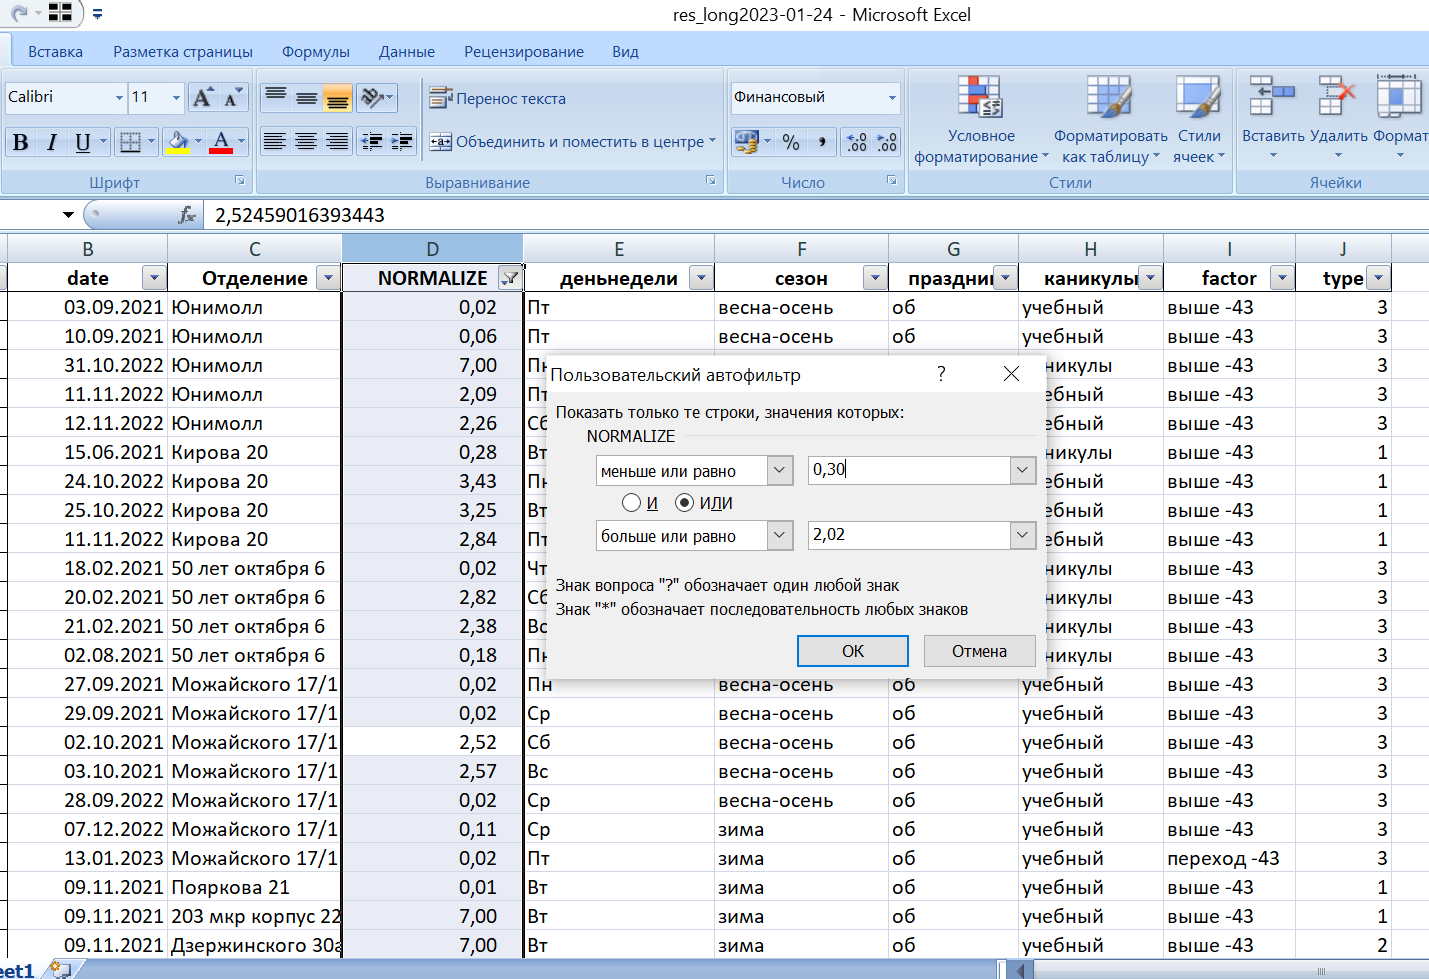

In [346]:
errors = (res_long.NORMALIZE<0.30)|(res_long.NORMALIZE>2)

In [349]:
len(res_long[errors]), len(res_long)

(35, 9739)

In [352]:
# Исключаем 35 из 9739 строк
res_long = res_long[~errors]

In [353]:
#пробуем без типа, чисто по ТТ
res_TT = res_long[['date', 'Отделение', 'NORMALIZE', 'деньнедели', 'сезон', 'праздник',
                   'каникулы', 'factor']]\
         .groupby(by=['Отделение', 'деньнедели', 'сезон', 'праздник','каникулы', 'factor'])\
         .aggregate(['count','mean', 'sem'])\
         .reset_index()
res_TT.sample(20)

Отделение деньнедели        сезон  праздник  каникулы  \
                                                                           
1116             Пояркова 21         Пн         лето        об  каникулы   
246              Алексеева 7         Чт  весна-осень  праздник   учебный   
1097             Пояркова 21         Вт  весна-осень  праздник   учебный   
328           Дзержинского 1         Ср  весна-осень  праздник   учебный   
1226                 Юнимолл         Вс  весна-осень        об  каникулы   
779          Лермонтова 62/2         Вт         зима        об   учебный   
154         50 лет октября 6         Чт         зима        об   учебный   
1037  Павильон Пояркова 20/1         Вт         зима        об   учебный   
1449      ул. Ф.Попова д. 15         Чт  весна-осень        об   учебный   
316           Дзержинского 1         Сб         зима        об  каникулы   
1301                 Юнимолл         Ср         зима        об  каникулы   
883          Можайского 17/1         Пн         зима        об   учебный   
1286                 Юнимолл         Сб  весна-осень  праздник   учебный   
363         Дзержинского 30а         Вт  весна-осень   послепр   учебный   
137         50 лет октября 6         Ср  весна-осень        об   учебный   
1125             Пояркова 21         Пт         зима    предпр  каникулы   
843          Лермонтова 62/2         Чт  весна-осень   послепр   учебный   
927          Орджоникидзе 18         Вс  весна-осень        об   учебный   
931          Орджоникидзе 18         Вс         зима        об  каникулы   
1339   ул. 203 мкр, 8 корпус         Вт  весна-осень  праздник   учебный   

           factor NORMALIZE                      
                      count      mean       sem  
1116     выше -43        13  1.043933  0.033635  
246      выше -43         1  1.359058       NaN  
1097     выше -43         1  0.929615       NaN  
328      выше -43         1  1.133869       NaN  
1226     выше -43         6  1.024701  0.052896  
779      выше -43        17  1.003301  0.032260  
154      ниже -43         2  1.016714  0.090384  
1037     выше -43         6  1.234076  0.086797  
1449     выше -43         3  1.135339  0.144835  
316      выше -43        10  0.897797  0.039280  
1301     выше -43         7  1.051584  0.053511  
883      ниже -43         1  1.206897       NaN  
1286     выше -43         1  1.298279       NaN  
363      выше -43         1  0.943686       NaN  
137      выше -43        36  0.925843  0.015857  
1125  переход -43         2  1.141804  0.092664  
843      выше -43         1  1.006757       NaN  
927      выше -43        33  0.649819  0.015883  
931      выше -43         8  0.697072  0.075911  
1339     выше -43         1  0.991329       NaN

### Сохранение результата c группировкой по ТТ

In [355]:
res_TT.to_excel('../data/res_TT.xlsx')

### Пробуем группировку c типом

In [358]:
res_typeTT = res_long[[ 'type','Отделение', 'NORMALIZE', 'деньнедели', 'сезон', 'праздник',
                   'каникулы', 'factor']]\
         .groupby(by=[ 'type', 'деньнедели', 'сезон', 'праздник','каникулы', 'factor'])\
         .agg(['count','mean','sem'])\
         .reset_index()
res_typeTT.sample(15)

type деньнедели        сезон  праздник  каникулы       factor NORMALIZE  \
                                                                      count   
155    2         Сб  весна-осень  праздник   учебный     выше -43         2   
216    3         Вт         зима  праздник   учебный     выше -43         3   
218    3         Вт         зима    предпр  каникулы     выше -43         3   
236    3         Пт  весна-осень        об  каникулы     выше -43        23   
47     1         Пт  весна-осень        об   учебный     выше -43       260   
79     1         Ср         зима   послепр  каникулы     выше -43         5   
261    3         Ср  весна-осень        об  каникулы     выше -43        12   
253    3         Сб         зима        об   учебный     выше -43        45   
89     1         Чт         зима        об   учебный     выше -43       159   
182    2         Чт  весна-осень  праздник   учебный     выше -43         3   
246    3         Пт         зима    предпр  каникулы  переход -43         7   
154    2         Сб  весна-осень        об   учебный     выше -43        82   
95     2         Вс  весна-осень        об  каникулы     выше -43        15   
188    2         Чт         зима    предпр  каникулы     ниже -43         3   
119    2         Вт         зима        об   учебный  переход -43         6   

                         
         mean       sem  
155  0.842219  0.076441  
216  1.004734  0.039077  
218  1.126918  0.014303  
236  1.034679  0.022867  
47   1.115300  0.006117  
79   1.055655  0.090791  
261  0.990122  0.009148  
253  1.049685  0.020681  
89   1.114633  0.010908  
182  1.082609  0.036549  
246  1.336910  0.030310  
154  0.924092  0.012329  
95   0.851133  0.036342  
188  1.058675  0.015731  
119  1.017442  0.032195

### Сохранение результата c группировкой по типу ТТ

In [359]:
res_TT.to_excel('../data/res_typeTT.xlsx')

# Прогноз по неделям

### Сезонные и недельные колебания по 2021 и 2022 году
2022 год Недельные колебания порядка 30%,  Сезонные колибания до 50% 

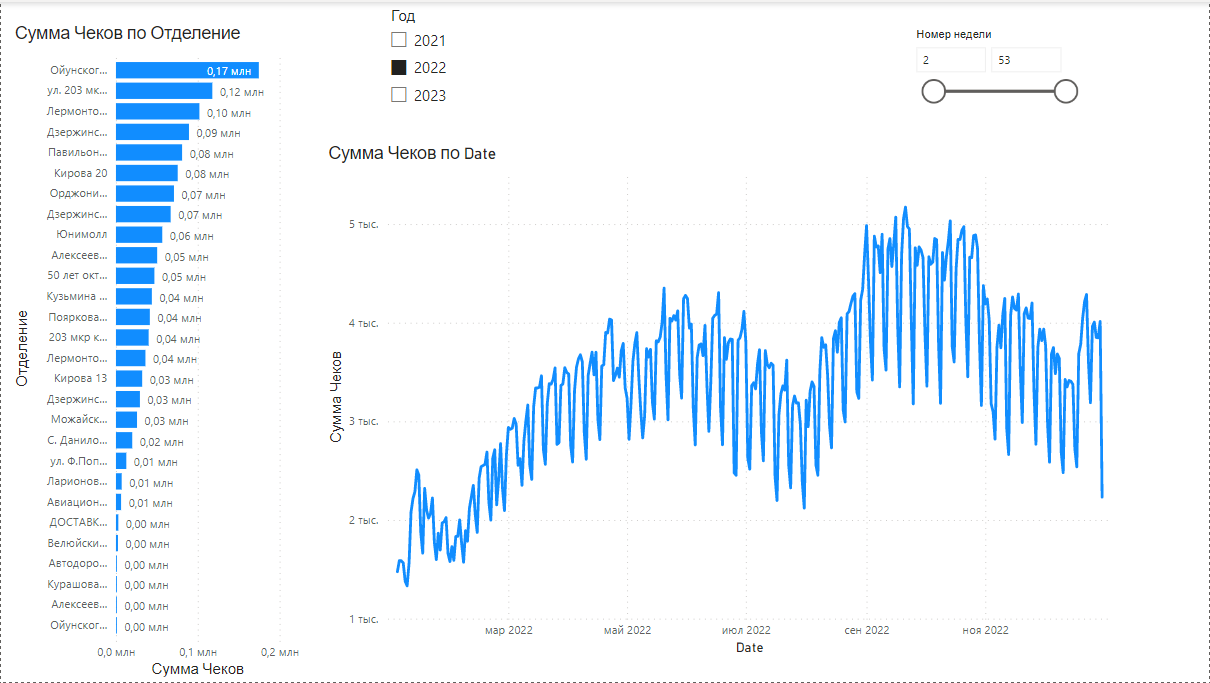

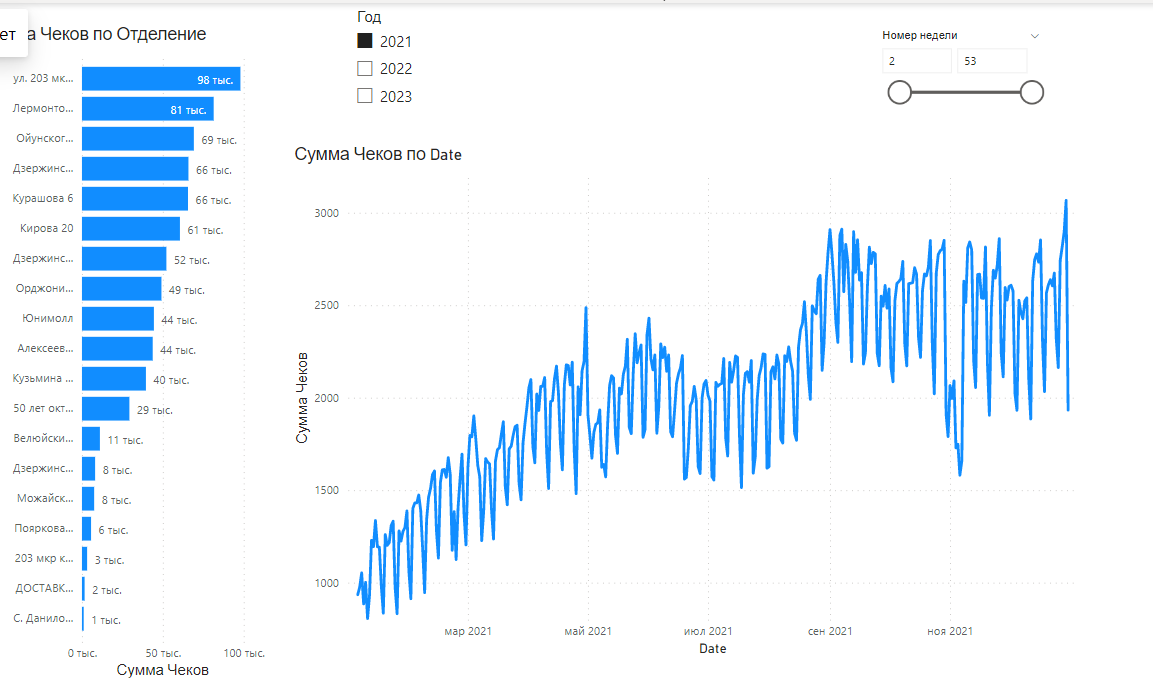

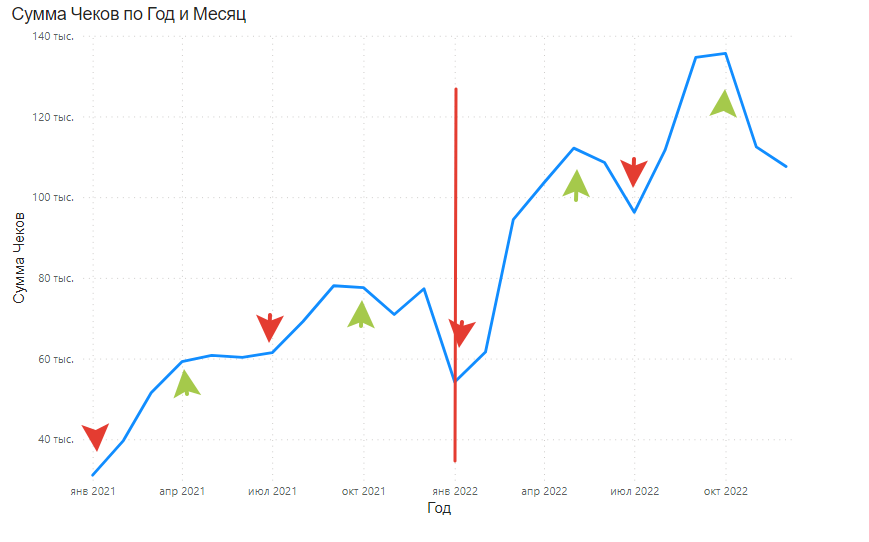






### ВЫВОД: На этом этапе пока не разрабатывать алгоритм долгосрочного недельного прогноза, а сделать ручной прогноз на февраль 2023 используя визуализации данного исследования
Подробно этот вывод обоснован в отдельном приложении по ссылке: https://docs.google.com/document/d/1Ne0J83KB8e4CpFxCBIX2P1ZEr2hkGdkx/edit?usp=share_link&ouid=114754993604113703845&rtpof=true&sd=true

# Saves

### for Power BI

In [86]:
soursefolder = '../data/for_pwbi/'

In [87]:
df.to_excel(soursefolder+'pwbi0.xlsx')

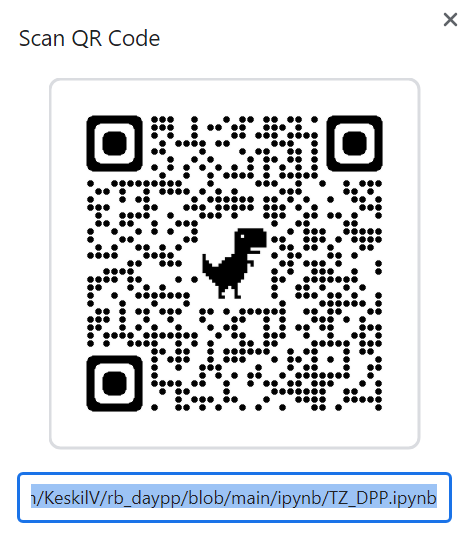